In [3]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
import matplotlib.dates as mdates
from scipy import stats
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.decomposition import PCA, IncrementalPCA

In [5]:
df=pd.read_csv("Fractionator.csv")


In [5]:
df.columns


Index(['Time', 'AI_2020_OVERHEAD_C5'S_MOL', 'AI_2021_MIDDLE_C7'S_MOL',
       'AI_2022_BOTTOM_C3'S_MOL', 'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
       'FIC-2101_PV_TOP_PRODUCT_MBBL/D', 'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
       'FI-2005_PV_FEED_FLOW_MBBL/D', 'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
       'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
       'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 'FIC_2004_PV_TOP_REFLUX_MBBL/D',
       'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
       'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF'],
      dtype='object')

In [6]:
from datetime import date
df['Time']=pd.to_datetime(df['Time'])

In [7]:
good_data=df[(np.abs(stats.zscore(df["AI_2020_OVERHEAD_C5'S_MOL"])) < 3)]

In [8]:
manipulated_variables=["AI_2020_OVERHEAD_C5'S_MOL", "AI_2021_MIDDLE_C7'S_MOL",
       "AI_2022_BOTTOM_C3'S_MOL"]
controlled_variables=[
       'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
       'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 
       'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']
reponse_variables=['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
       'FIC-2101_PV_TOP_PRODUCT_MBBL/D', 'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
       'FI-2005_PV_FEED_FLOW_MBBL/D',
       'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
       'FIC_2004_PV_TOP_REFLUX_MBBL/D',
       'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',]

In [9]:
list(enumerate(manipulated_variables))
for i in enumerate(controlled_variables):
    print(df[controlled_variables].columns[i[0]])

FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D
FIC-2001_OP_TOP_REFLUX_OUTPUT_%
FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D
FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%
FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D
FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%
TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF


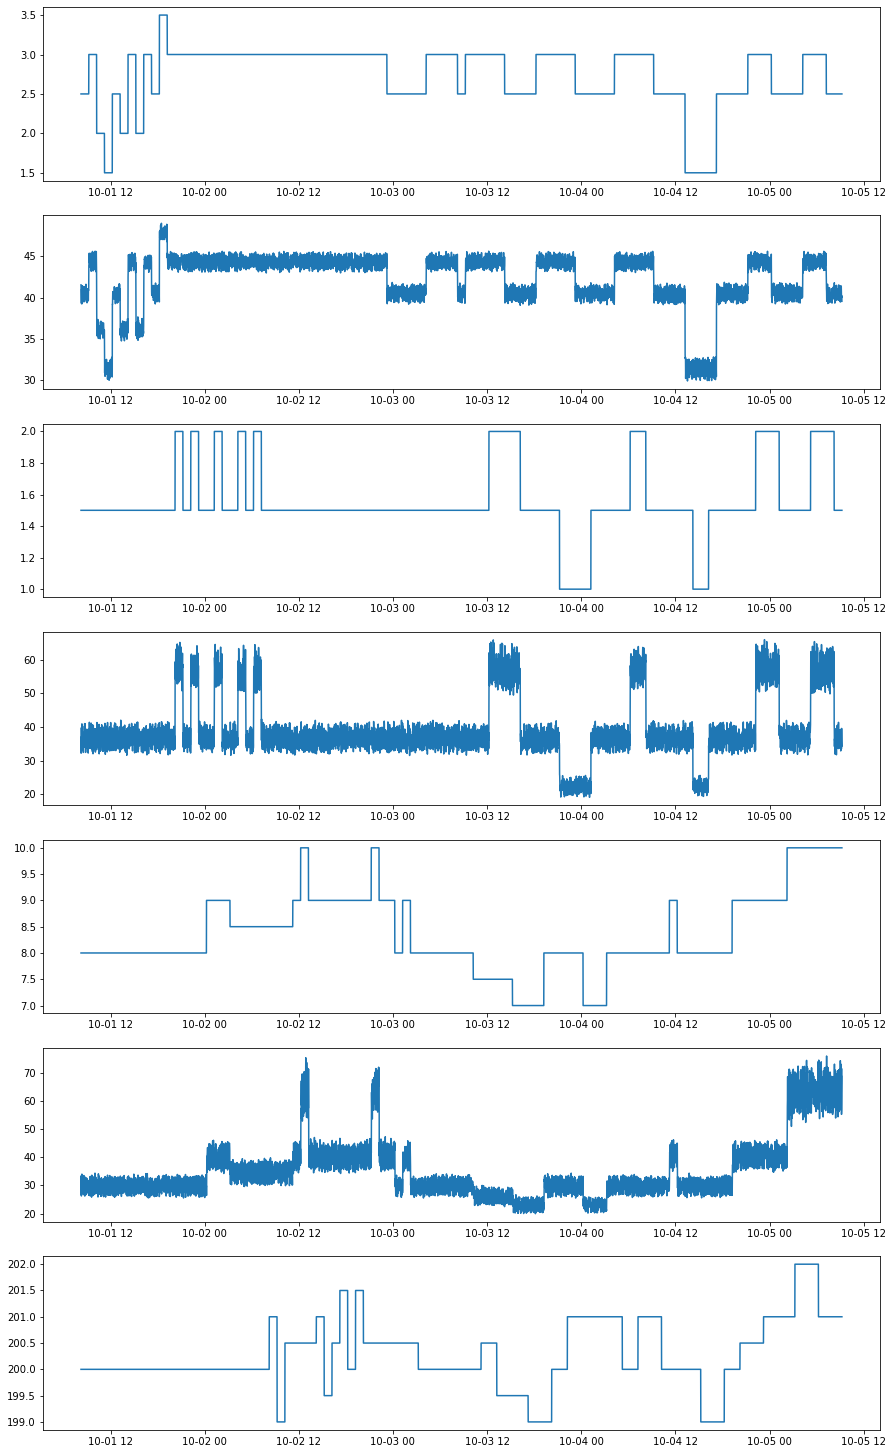

In [10]:
plt.figure(figsize = (15, 30))
for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    plt.plot(df["Time"],df[i[1]])
plt.show()

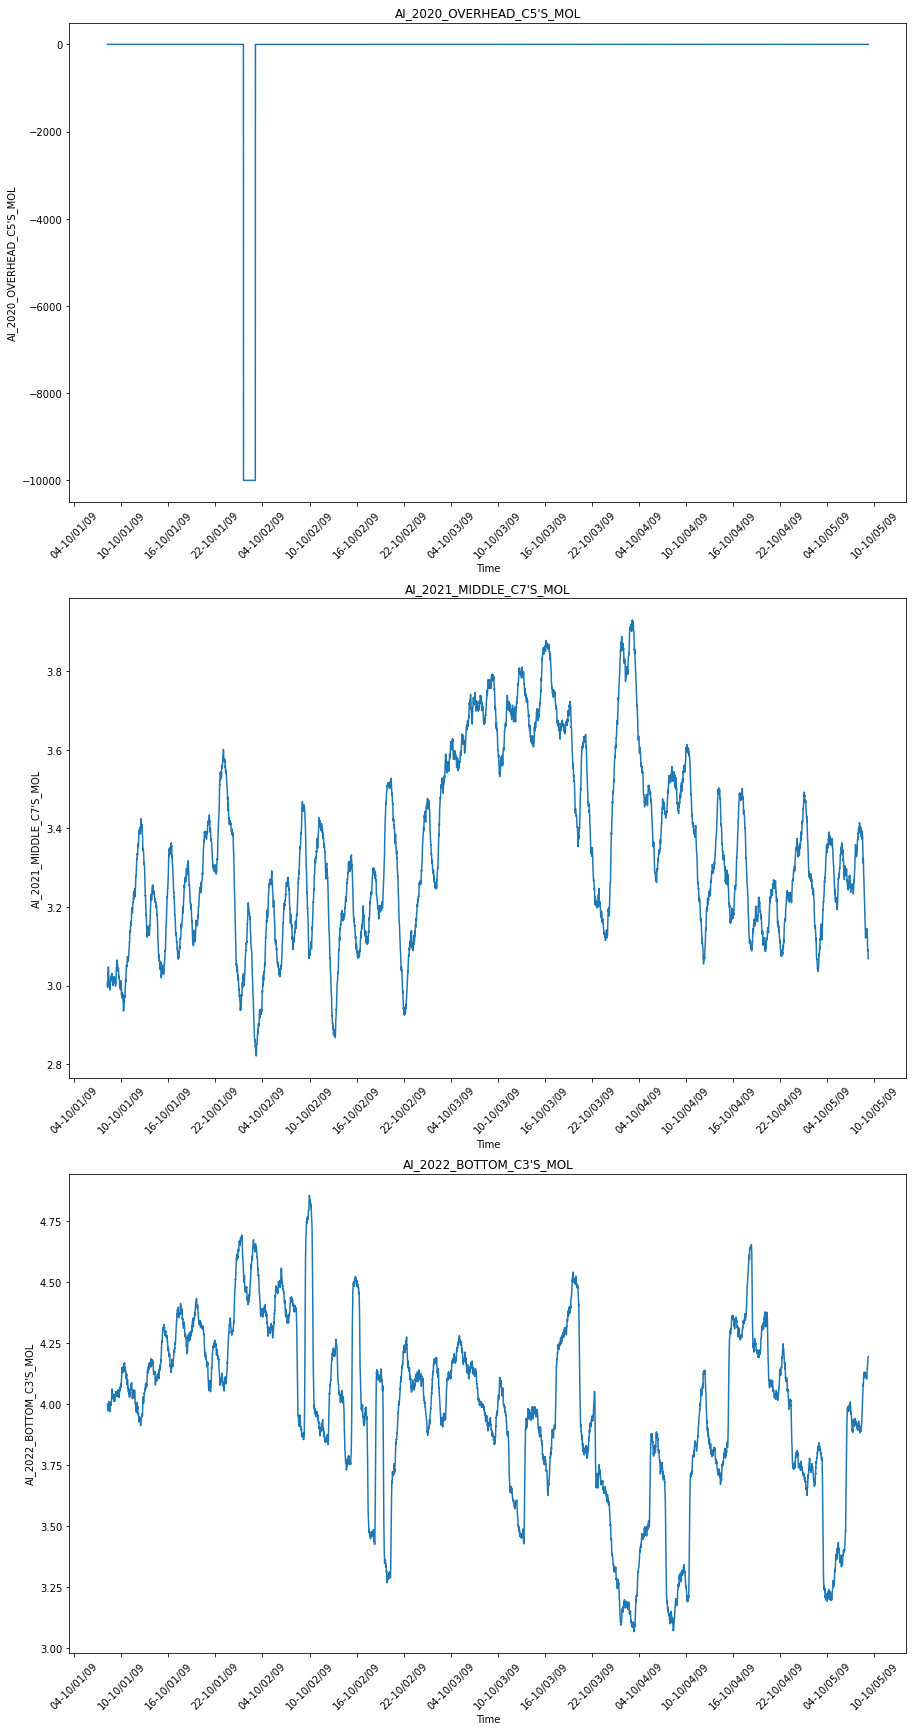

In [11]:
plt.figure(figsize = (15, 30))
for i in enumerate(manipulated_variables):
    plt.subplot(3, 1,i[0]+1)
    plt.plot(df["Time"],df[i[1]])
    plt.title(df[manipulated_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(df[manipulated_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)


plt.show()

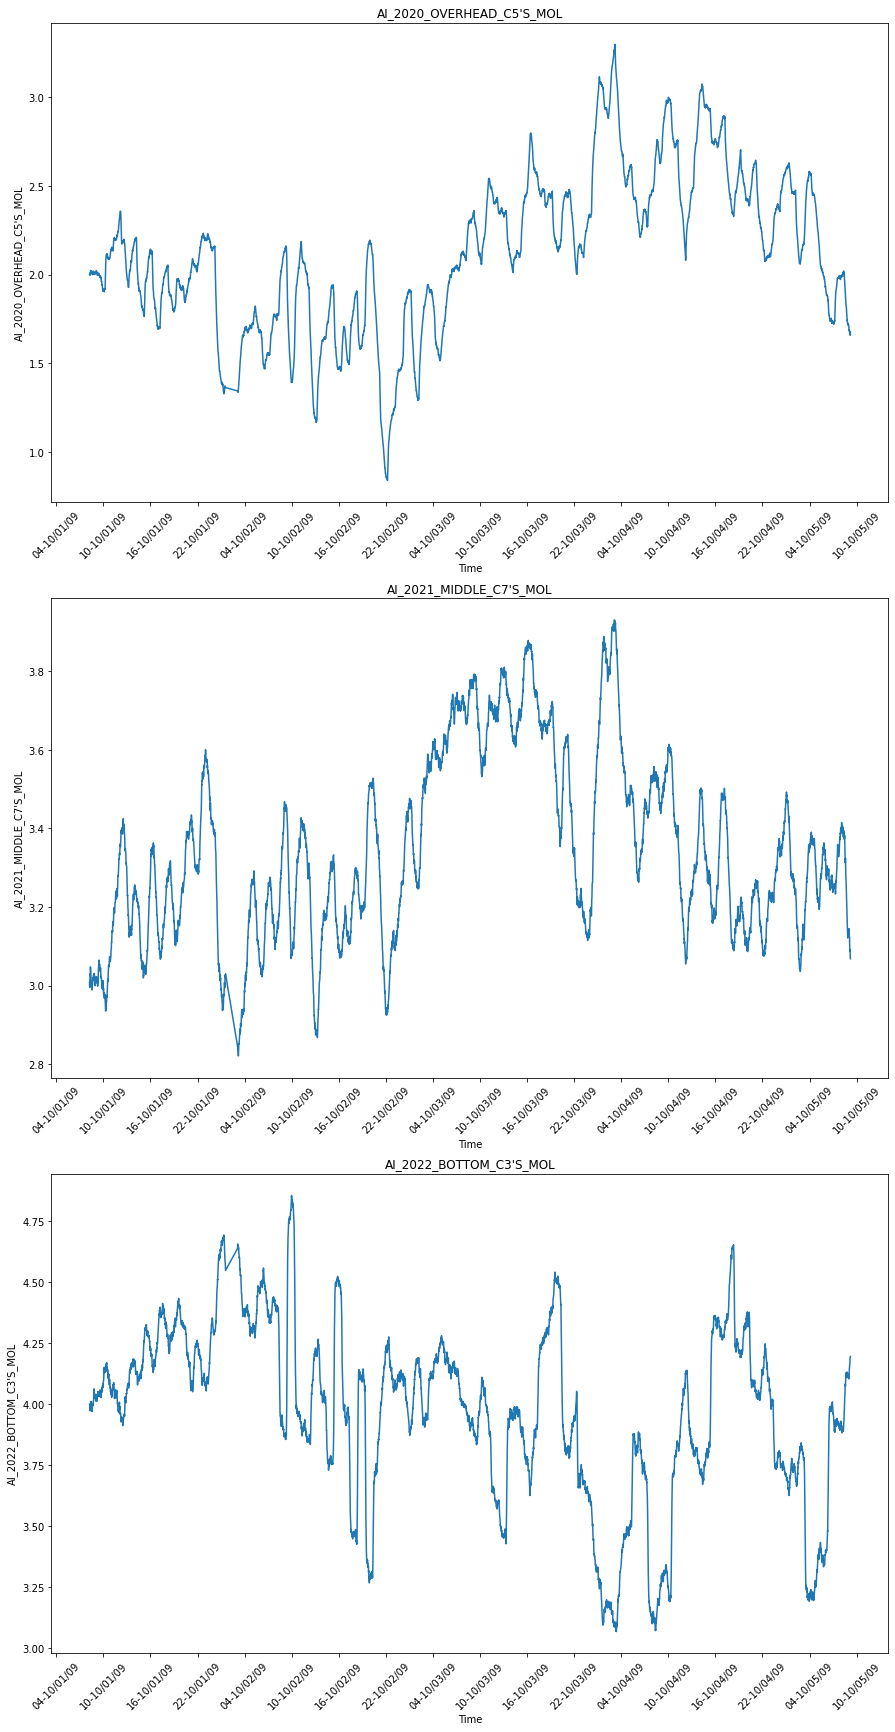

In [12]:
plt.figure(figsize = (15, 30))
for i in enumerate(manipulated_variables):
    plt.subplot(3, 1,i[0]+1)
    plt.plot(good_data["Time"],good_data[i[1]])
    plt.title(good_data[manipulated_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(good_data[manipulated_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)


plt.show()

In [13]:
FIC_reflux_top=['FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D','FIC-2001_OP_TOP_REFLUX_OUTPUT_%','FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D']
FIC_reflux_middle=[ 'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D']
FIC_reflux_bottom=['FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 'FIC_2004_PV_TOP_REFLUX_MBBL/D']
furnace=['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH','TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']

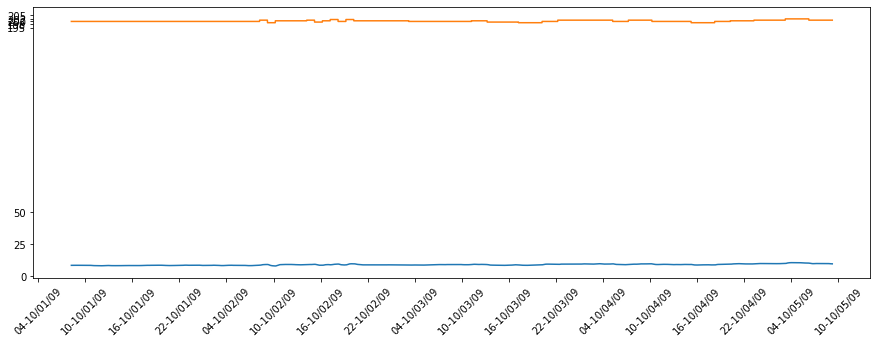

In [14]:
plt.figure(figsize = (15, 5))
for i in enumerate(furnace):
    plt.plot(df["Time"],df[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

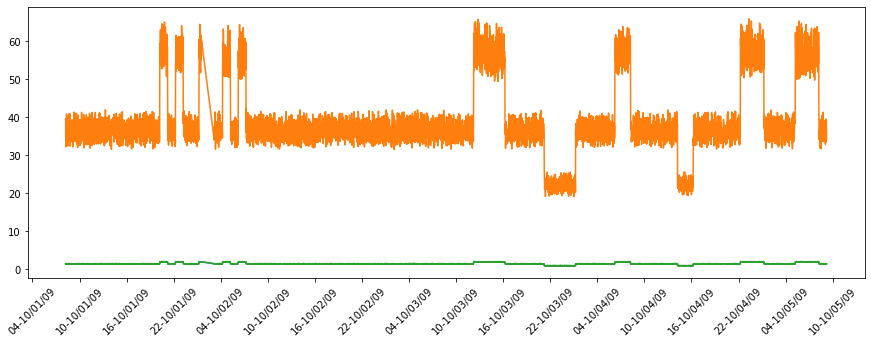

In [15]:
plt.figure(figsize = (15, 5))
for i in enumerate(FIC_reflux_middle):
    plt.plot(good_data["Time"],good_data[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    #plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [16]:
target=good_data[manipulated_variables]
data=good_data[controlled_variables+reponse_variables]

In [17]:
data.corr()

,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H
FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,1.000000,0.981528,0.266313,0.243396,0.170825,0.135397,0.174440,0.026288,-0.419776,0.060521,-0.021923,0.980009,0.265144,0.170146,0.284550
FIC-2001_OP_TOP_REFLUX_OUTPUT_%,0.981528,1.000000,0.268394,0.244264,0.166962,0.135121,0.180826,0.036836,-0.402920,0.052079,-0.018033,0.991546,0.266644,0.166105,0.277906
FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,0.266313,0.268394,1.000000,0.951962,0.150328,0.163090,0.053747,0.020266,-0.034356,-0.302132,-0.024602,0.262816,0.984732,0.147862,0.225270
FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,0.243396,0.244264,0.951962,1.000000,0.127587,0.146202,0.062560,0.041381,-0.001350,-0.297423,-0.013751,0.239624,0.951683,0.125900,0.189590
FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,0.170825,0.166962,0.150328,0.127587,1.000000,0.918246,0.509396,0.447868,0.034506,0.308827,0.270945,0.167011,0.149293,0.991276,0.871146
FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,0.135397,0.135121,0.163090,0.146202,0.918246,1.000000,0.522131,0.502408,0.099093,0.249892,0.292929,0.131806,0.162047,0.919339,0.788004
TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF,0.174440,0.180826,0.053747,0.062560,0.509396,0.522131,1.000000,0.705070,0.450846,-0.404779,0.194366,0.168893,0.053906,0.506611,0.307202
FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,0.026288,0.036836,0.020266,0.041381,0.447868,0.502408,0.705070,1.000000,0.785949,-0.020650,0.701633,0.024442,0.018173,0.444731,0.217991
FIC-2101_PV_TOP_PRODUCT_MBBL/D,-0.419776,-0.402920,-0.034356,-0.001350,0.034506,0.099093,0.450846,0.785949,1.000000,-0.226228,0.586865,-0.412695,-0.037769,0.031764,-0.211327
FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,0.060521,0.052079,-0.302132,-0.297423,0.308827,0.249892,-0.404779,-0.020650,-0.226228,1.000000,0.371252,0.062734,-0.298491,0.310565,0.338084


In [18]:
target=target.to_numpy()
data=data.to_numpy()

In [19]:
X=good_data.iloc[:,4:]

In [20]:
y=good_data.iloc[:,1:4]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=44, shuffle =True)

<ipython-input-22-90de24225cb6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig3=sns.heatmap(good_data.corr(method='spearman'),vmin=-1,vmax=1,cmap= 'seismic',annot=True,square=True)


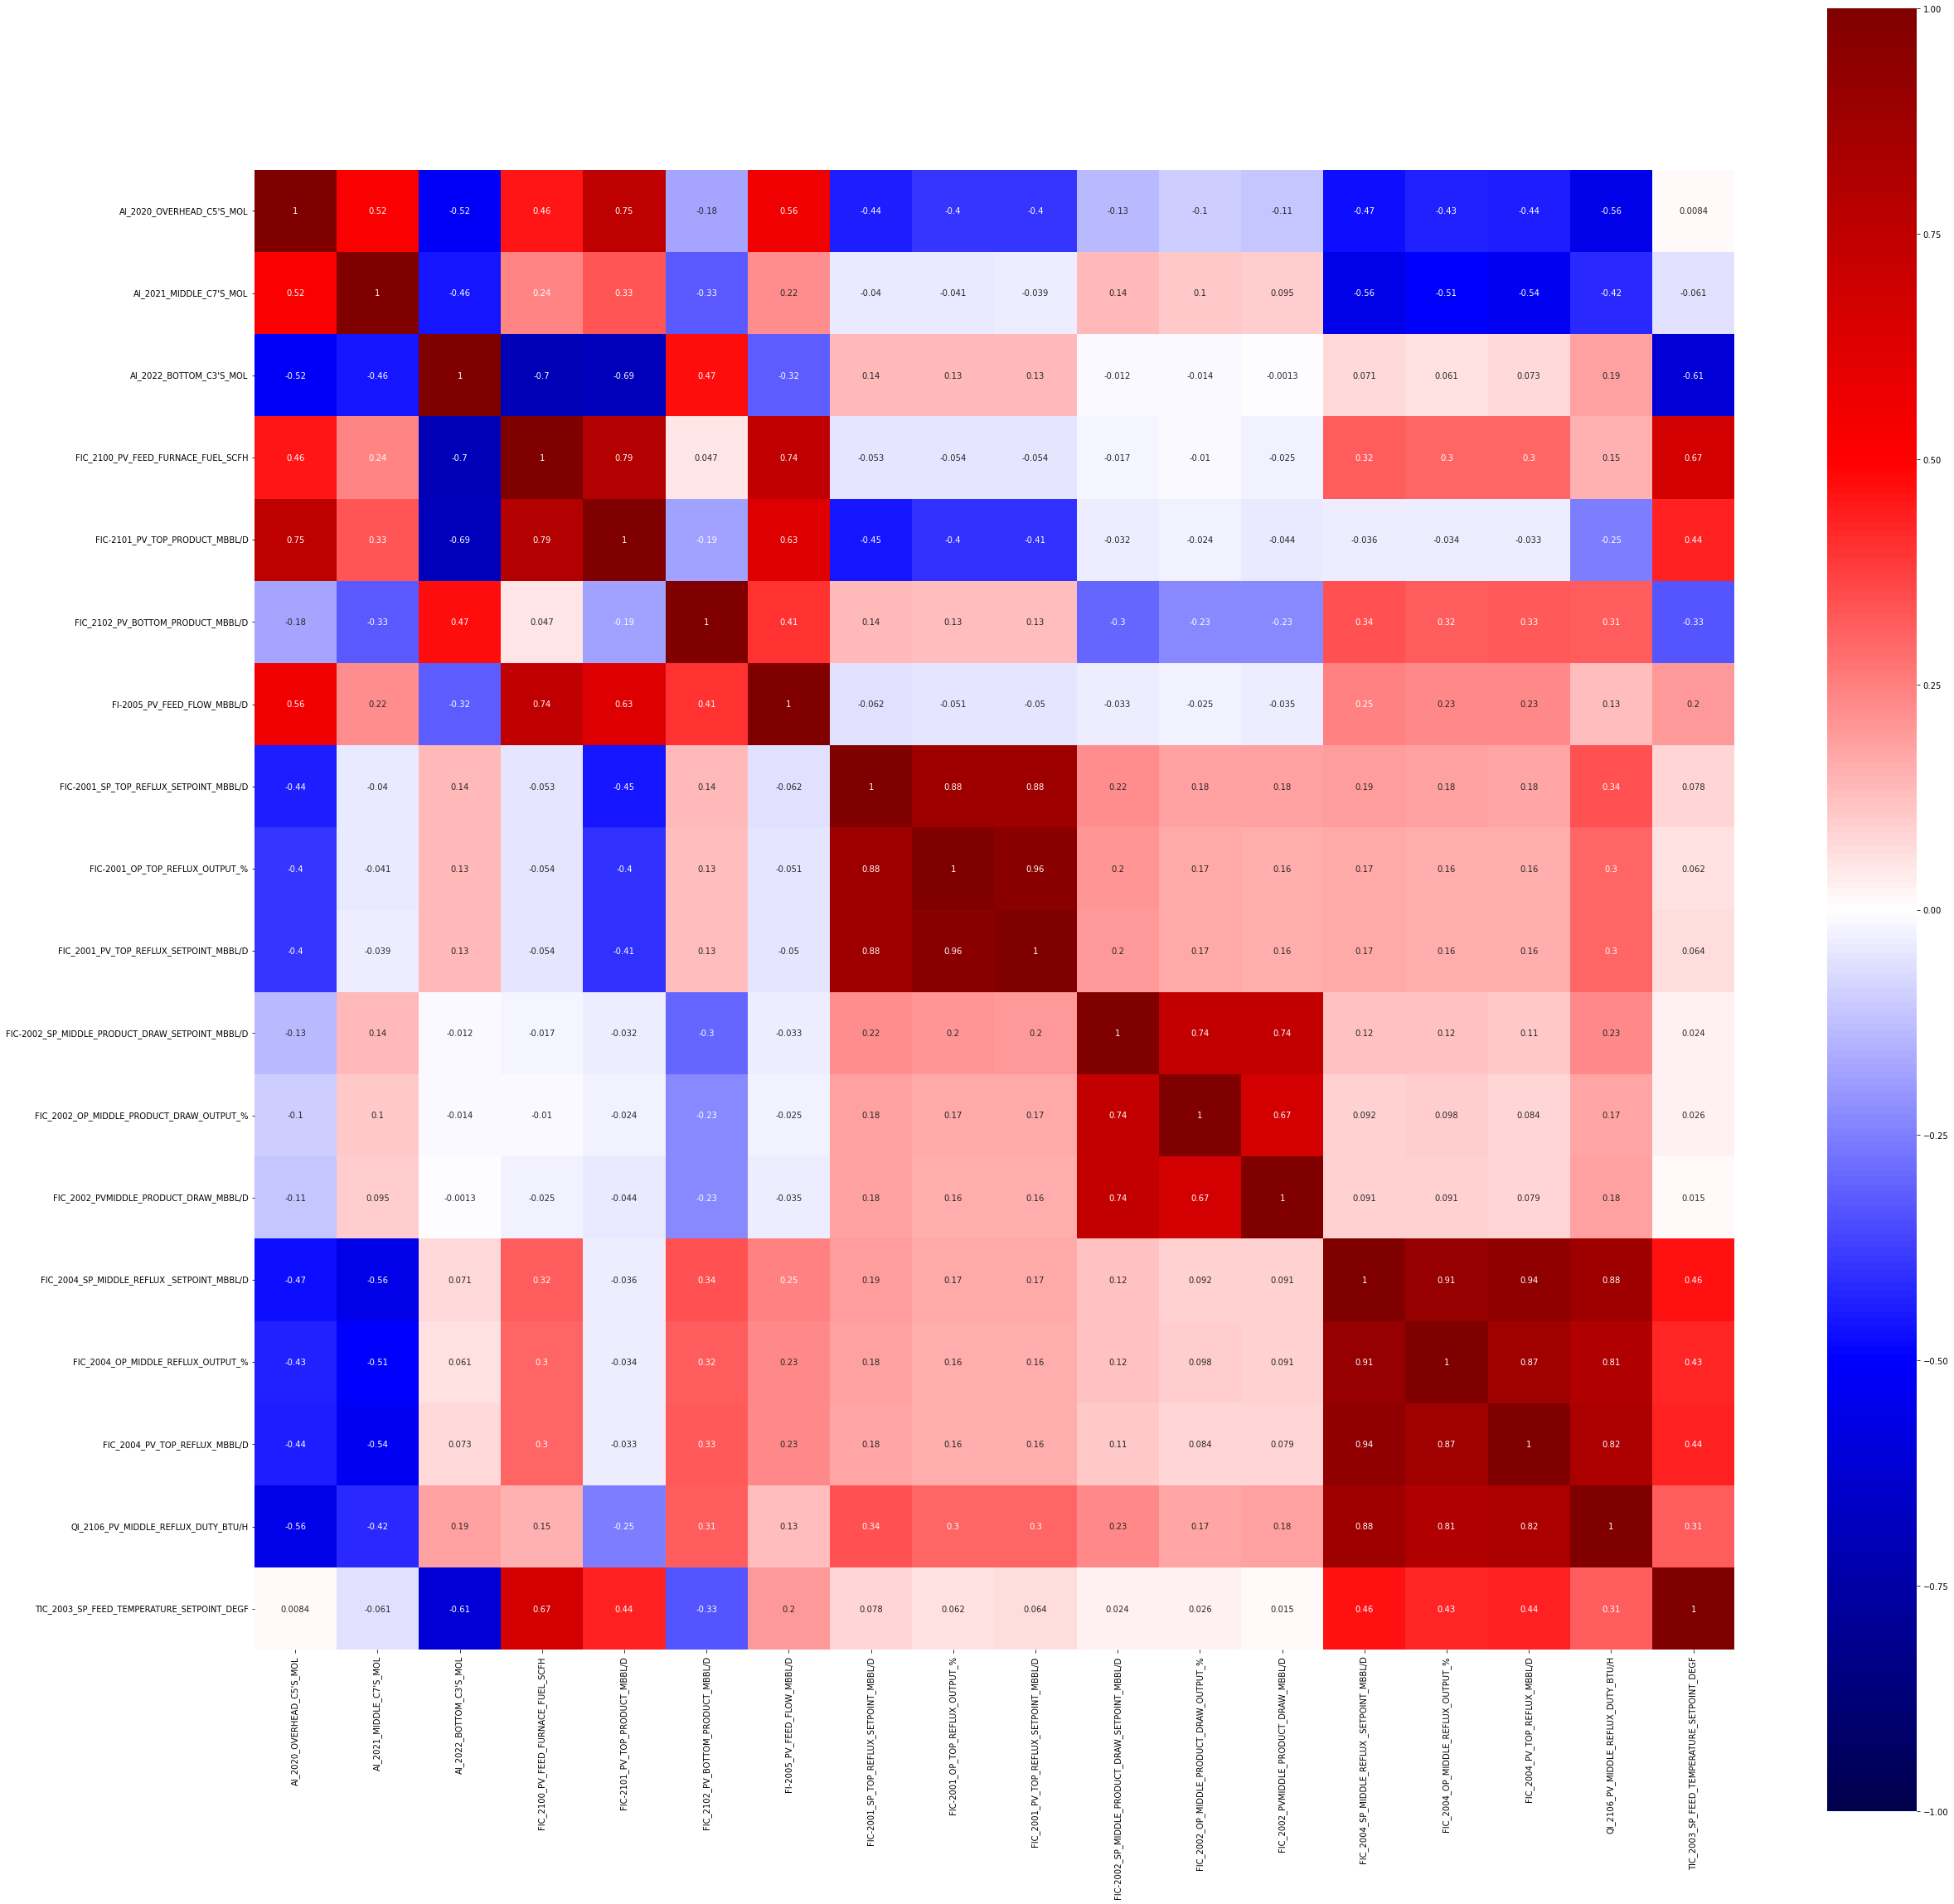

In [22]:
#find the correlation between features
plt.figure(figsize=(40,40))
fig3=sns.heatmap(good_data.corr(method='spearman'),vmin=-1,vmax=1,cmap= 'seismic',annot=True,square=True)
fig3.figure.savefig('heat map correlation.png')
plt.show()

### normalizaation

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(X)
X_scaled_data=model.transform(X)

In [24]:
X_scaled=pd.DataFrame(X_scaled_data,columns=['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
       'FIC-2101_PV_TOP_PRODUCT_MBBL/D', 'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
       'FI-2005_PV_FEED_FLOW_MBBL/D', 'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
       'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
       'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 'FIC_2004_PV_TOP_REFLUX_MBBL/D',
       'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
       'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF'])

In [25]:
X_scaled.head()

,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
0,0.191470,0.254126,0.449522,0.435341,0.5,0.609533,0.566830,0.5,0.437643,0.520090,0.333333,0.126580,0.351957,0.449178,0.333333
1,0.194285,0.253271,0.454974,0.432407,0.5,0.568690,0.510344,0.5,0.280110,0.427792,0.333333,0.196911,0.340550,0.448546,0.333333
2,0.195211,0.252165,0.457401,0.428264,0.5,0.505504,0.458780,0.5,0.372752,0.520357,0.333333,0.240929,0.311924,0.447936,0.333333
3,0.194679,0.250277,0.455440,0.427695,0.5,0.492361,0.429233,0.5,0.383269,0.479009,0.333333,0.112414,0.342419,0.447744,0.333333
4,0.192868,0.248754,0.453808,0.430770,0.5,0.538693,0.508264,0.5,0.300502,0.463258,0.333333,0.172841,0.351383,0.447694,0.333333


In [26]:
len(X_scaled.columns)

15

In [27]:
y.head()

,AI_2020_OVERHEAD_C5'S_MOL,AI_2021_MIDDLE_C7'S_MOL,AI_2022_BOTTOM_C3'S_MOL
0,2.00000,3.00000,4.00000
1,2.00360,3.00954,3.99831
2,2.00870,2.99518,3.97746
3,2.00385,3.01356,3.97262
4,1.99852,3.02963,3.98841


In [28]:
len(y.columns)

3

In [29]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.data = pd.read_csv("Fractionator.csv")
        self.X = self.data.iloc[:,4:].values
        self.y = self.data.iloc[:,3:4].values
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        X = torch.tensor(self.X[index], dtype=torch.float32)
        y = torch.tensor(self.y[index], dtype=torch.float32)
        return X, y

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
X=CustomDataset()

In [31]:
# what can it do?
# for now only return the ith sample and label
for i in range(min(5,X.__len__())):
    # access our ith sample
    print(X[i])

(tensor([  8.5000,   2.1000,   1.7000,   5.0215,   2.5000,  41.5425,   2.6433,
          1.5000,  39.6248,   1.5503,   8.0000,  27.0211,   8.0638,   2.0000,
        200.0000]), tensor([4.]))
(tensor([  8.5073,   2.0969,   1.7173,   4.9877,   2.5000,  40.7619,   2.5138,
          1.5000,  32.2511,   1.4395,   8.0000,  30.9622,   8.0241,   1.9977,
        200.0000]), tensor([3.9983]))
(tensor([  8.5098,   2.0928,   1.7250,   4.9399,   2.5000,  39.5543,   2.3955,
          1.5000,  36.5874,   1.5507,   8.0000,  33.4288,   7.9243,   1.9955,
        200.0000]), tensor([3.9775]))
(tensor([  8.5084,   2.0859,   1.7188,   4.9333,   2.5000,  39.3031,   2.3277,
          1.5000,  37.0797,   1.5010,   8.0000,  26.2273,   8.0306,   1.9948,
        200.0000]), tensor([3.9726]))
(tensor([  8.5036,   2.0803,   1.7136,   4.9688,   2.5000,  40.1886,   2.5090,
          1.5000,  33.2056,   1.4821,   8.0000,  29.6134,   8.0618,   1.9947,
        200.0000]), tensor([3.9884]))


In [32]:
pip install torchmetrics


  Using cached torchmetrics-0.11.4-py3-none-any.whl (519 kB)

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
from torch import nn
from torch.nn import functional as F
from torchmetrics import MeanSquaredError
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import preprocessing
from enum import Enum 
import pandas as pd
import copy
#from pytorch_lightning import LightningModule, Trainer
from torch import nn
import torch
from torch.nn import functional as F

In [34]:
dl=DataLoader(X,batch_size=32, num_workers=2, shuffle=True,drop_last=True)


In [35]:
# use dataloader
counter=0
for epoch in [1,2,3]:
    for batch,label in dl:
        if counter==0:
            print(batch,label)
            counter+=1
        print(batch.size(),label.size())

[2023-03-31 21:42:08.499 pytorch-1-13-cpu-py39-ml-t3-medium-9140905751f3e451a2295c86a7c3:65 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-31 21:42:08.564 pytorch-1-13-cpu-py39-ml-t3-medium-9140905751f3e451a2295c86a7c3:65 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
tensor([[  8.2703,   1.2273,   1.1287,   4.9445,   3.0000,  44.2760,   2.9228,
           1.5000,  34.6413,   1.5038,   8.0000,  27.3725,   7.9419,   1.8753,
         200.0000],
        [  8.3638,   2.3891,   1.2919,   4.8458,   2.5000,  41.6648,   2.6155,
           1.5000,  33.6747,   1.5035,   8.0000,  28.0047,   7.9106,   1.8433,
         200.0000],
        [  8.4365,   2.1773,   1.8087,   5.2181,   3.0000,  44.8276,   3.0705,
           1.5000,  34.6083,   1.4443,   8.0000,  32.5831,   8.0655,   2.1047,
         200.0000],
        [  8.4125,   2.1198,   1.5961,   5.4164,   3.0000,  44.1509,   2.9729,
           1.5000,  39.8

In [36]:
# Minmal Example using Pytorch
# Define some simple model to get started
class SimpleModel(torch.nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.model=nn.Sequential(
           # nn.Flatten(),
            nn.Linear(15, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            #nn.Dropout(0.1),
            nn.Linear(32,1),
        )

    def forward(self, x):
        z = self.model(x)
        return z
    #F.log_softmax(z, dim=1)

# Create model
model=SimpleModel().to('cpu')
# Create dataloader with sensible parameters
dl=DataLoader(X,batch_size=4, num_workers=1, shuffle=True,drop_last=True)
# optimizer creation for training
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)
model.train()
# training loop
for epoch in range(20):
    for batch, label in dl:
        # for each batch do a forward pass
        optimizer.zero_grad()
        oupt = model(batch)
        # calculate the loss
        loss_obj =  nn.L1Loss()
        # updates
        #loss_obj.backward()
        optimizer.step()

In [37]:
#Do evaluation and the rest
model.eval()
# We simply evaluate on the training set, this is bad
# But also the results will be bad, we will make it better in the Full Example version
acc=MeanSquaredError()
# evaluation simple, quick to make tutorial fast
dl=DataLoader(X,batch_size=240, num_workers=2, shuffle=False,drop_last=True)
for batch, label in dl:
    print("Result is bad, we will see why in a minute!")
    print(acc(torch.argmax(model(batch),dim=1),label))
    break

Result is bad, we will see why in a minute!


RuntimeError: Predictions and targets are expected to have the same shape, but got torch.Size([240]) and torch.Size([240, 1]).

In [38]:
import pandas as pd
import numpy as np
import boto3
from sklearn.model_selection import train_test_split

# Load the CSV data
data = pd.read_csv('Fractionator.csv')

# Split the data into training, validation, and testing sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(val_data, test_size=0.5, random_state=42)

# Save the data to separate CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Upload the data to an S3 bucket
s3 = boto3.client('s3')
bucket_name = 'fractionatordata'

s3.upload_file('train_data.csv', bucket_name, 'data/train_data.csv')
s3.upload_file('val_data.csv', bucket_name, 'data/val_data.csv')
s3.upload_file('test_data.csv', bucket_name, 'data/test_data.csv')

,Time,AI_2020_OVERHEAD_C5'S_MOL,AI_2021_MIDDLE_C7'S_MOL,AI_2022_BOTTOM_C3'S_MOL,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
2098,10/2/2009 19:12,1.68465,3.20337,4.09304,8.83494,2.20530,2.67915,6.58731,3.0,44.4497,3.08843,1.5,36.6939,1.47880,9.0,34.5037,8.82943,2.52777,200.0
5362,10/5/2009 1:36,2.52730,3.30953,3.71554,9.85001,4.13629,1.62819,6.50479,2.5,39.3586,2.42856,1.5,36.7432,1.54197,9.0,42.8473,9.06877,2.33410,201.0
505,10/1/2009 16:39,1.81013,3.25841,4.19322,8.33068,1.45703,1.13370,4.95377,3.0,43.8462,2.98765,1.5,37.3281,1.43134,8.0,25.9492,7.90786,2.01045,200.0
2464,10/3/2009 1:18,1.74984,3.44087,3.92385,8.82646,2.71441,1.10967,5.16559,2.5,41.2473,2.63877,1.5,38.8704,1.53329,9.0,38.5040,8.88086,2.41305,200.5
3567,10/3/2009 19:41,2.18347,3.53365,4.50296,8.82556,2.00315,3.37508,6.73076,3.0,45.0059,3.06636,1.5,39.4763,1.51897,8.0,32.2528,8.07747,2.61402,199.0


In [ ]:
s3://fractionatordata/data/test_data.csv

In [46]:
import pandas as pd
import numpy as np
import boto3
from sklearn.model_selection import train_test_split

# Load the CSV data
data = pd.read_csv('Fractionator.csv')

# Split the data into features and targets
X = data.iloc[:,4:]
y = data.iloc[:,1:4]

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Combine the features and targets into dataframes
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the data to separate CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Upload the data to an S3 bucket
s3 = boto3.client('s3')
bucket_name = 'fractionatordata'

s3.upload_file('train_data.csv', bucket_name, 'data/train_data.csv')
s3.upload_file('val_data.csv', bucket_name, 'data/val_data.csv')
s3.upload_file('test_data.csv', bucket_name, 'data/test_data.csv')

In [47]:
import sagemaker
from sagemaker.pytorch import PyTorch

role = sagemaker.get_execution_role()
bucket = 'fractionatordata'
#train_data = 's3://{}/path/to/train/data'.format(bucket)
#val_data = 's3://{}/path/to/val/data'.format(bucket)
#test_data = 's3://{}/path/to/test/data'.format(bucket)
train_data=pd.read_csv('s3://fractionatordata/data/train_data.csv')
test_dat=pd.read_csv('s3://fractionatordata/data/test_data.csv')
val_data=pd.read_csv("s3://fractionatordata/data/val_data.csv")

estimator = PyTorch(entry_point='train.py',
                    role=role,
                    train_instance_count=1,
                    train_instance_type='ml.c4.xlarge',
                    framework_version='1.8',
                    py_version='py3',
                    hyperparameters={
                        'batch-size': 64,
                        'epochs': 10,
                        'learning-rate': 0.01
                    })

estimator.fit({'train': train_data, 'validation': val_data, 'test': test_data})

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.


ValueError: Cannot format input       FIC_2100_PV_FEED_FURNACE_FUEL_SCFH  FIC-2101_PV_TOP_PRODUCT_MBBL/D  \
0                                8.28544                         2.69578   
1                                9.11142                         3.03137   
2                                8.87964                         2.41293   
3                                8.33835                         2.78567   
4                                9.02977                         2.58042   
...                                  ...                             ...   
4651                             9.50229                         3.09207   
4652                             9.58266                         3.64457   
4653                             9.65733                         3.70254   
4654                             9.82836                         4.04686   
4655                             8.59177                         2.20562   

      FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D  FI-2005_PV_FEED_FLOW_MBBL/D  \
0                               1.16526                      4.99810   
1                               2.22047                      6.31595   
2                               1.82304                      5.26043   
3                               1.26627                      5.11486   
4                               2.07422                      5.90228   
...                                 ...                          ...   
4651                            1.84062                      5.63162   
4652                            1.91343                      6.47585   
4653                            1.57224                      6.59692   
4654                            1.74148                      6.53536   
4655                            1.42561                      5.88810   

      FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D  FIC-2001_OP_TOP_REFLUX_OUTPUT_%  \
0                                        2.0                          35.7943   
1                                        2.5                          40.7203   
2                                        2.5                          41.3191   
3                                        2.0                          35.3057   
4                                        3.0                          43.3881   
...                                      ...                              ...   
4651                                     3.0                          44.0434   
4652                                     3.0                          43.7286   
4653                                     3.0                          44.1654   
4654                                     2.5                          41.7051   
4655                                     3.0                          44.8267   

      FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D  \
0                                    1.93119   
1                                    2.54255   
2                                    2.65968   
3                                    1.87564   
4                                    2.85208   
...                                      ...   
4651                                 2.99367   
4652                                 2.86121   
4653                                 3.01896   
4654                                 2.55640   
4655                                 3.07956   

      FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D  \
0                                                 1.5   
1                                                 1.5   
2                                                 1.5   
3                                                 1.5   
4                                                 1.5   
...                                               ...   
4651                                              1.0   
4652                                              2.0   
4653                                              2.0   
4654                                              1.5   
4655                                              2.0   

      FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%  \
0                                      31.6333   
1                                      39.1454   
2                                      36.4958   
3                                      38.1010   
4                                      40.2096   
...                                        ...   
4651                                   21.9887   
4652                                   55.6663   
4653                                   60.4515   
4654                                   39.0471   
4655                                   52.8401   

      FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D  \
0                                  1.456560   
1                                  1.511170   
2                                  1.559440   
3                                  1.471380   
4                                  1.550590   
...                                     ...   
4651                               0.965557   
4652                               1.979120   
4653                               1.902170   
4654                               1.549880   
4655                               2.018600   

      FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D  \
0                                            8.0   
1                                            8.0   
2                                            9.0   
3                                            8.0   
4                                            8.0   
...                                          ...   
4651                                         8.0   
4652                                         9.0   
4653                                         9.0   
4654                                         9.0   
4655                                         8.0   

      FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%  FIC_2004_PV_TOP_REFLUX_MBBL/D  \
0                                29.0694                        8.01228   
1                                30.1525                        7.97247   
2                                43.8540                        8.91116   
3                                29.4086                        7.94827   
4                                28.2340                        8.01270   
...                                  ...                            ...   
4651                             28.6372                        8.06563   
4652                             39.9781                        8.83252   
4653                             41.8884                        8.94540   
4654                             36.1114                        8.97297   
4655                             29.0245                        7.98636   

      QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H  \
0                                 1.89145   
1                                 2.02595   
2                                 2.54328   
3                                 1.95211   
4                                 2.03825   
...                                   ...   
4651                              1.80798   
4652                              2.44840   
4653                              2.46217   
4654                              2.30274   
4655                              2.21677   

      TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF  AI_2020_OVERHEAD_C5'S_MOL  \
0                                          200.0                    2.20339   
1                                          200.0                    2.15960   
2                                          200.5                    1.46101   
3                                          200.0                    2.10293   
4                                          200.0                    2.05944   
...                                          ...                        ...   
4651                                       201.0                    2.12409   
4652                                       200.5                    2.10506   
4653                                       201.0                    2.18870   
4654                                       201.0                    2.46704   
4655                                       200.0                    2.21223   

      AI_2021_MIDDLE_C7'S_MOL  AI_2022_BOTTOM_C3'S_MOL  
0                     3.25142                  4.16214  
1                     3.67240                  3.96629  
2                     3.21737                  4.12010  
3                     3.22732                  4.26748  
4                     3.54045                  4.07769  
...                       ...                      ...  
4651                  3.18129                  3.68429  
4652                  3.20870                  4.10130  
4653                  3.23356                  4.01742  
4654                  3.25559                  3.75131  
4655                  3.52187                  4.07896  

[4656 rows x 18 columns]. Expecting one of str, TrainingInput, file_input or FileSystemInput

In [8]:
good_data.head()

,Time,AI_2020_OVERHEAD_C5'S_MOL,AI_2021_MIDDLE_C7'S_MOL,AI_2022_BOTTOM_C3'S_MOL,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
0,2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000,2.10000,1.70000,5.02153,2.5,41.5425,2.64333,1.5,39.6248,1.55033,8.0,27.0211,8.06381,2.00000,200.0
1,2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735,2.09686,1.71730,4.98768,2.5,40.7619,2.51377,1.5,32.2511,1.43952,8.0,30.9622,8.02407,1.99772,200.0
2,2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977,2.09280,1.72500,4.93990,2.5,39.5543,2.39550,1.5,36.5874,1.55065,8.0,33.4288,7.92434,1.99552,200.0
3,2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838,2.08587,1.71878,4.93333,2.5,39.3031,2.32773,1.5,37.0797,1.50101,8.0,26.2273,8.03058,1.99483,200.0
4,2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365,2.08028,1.71360,4.96880,2.5,40.1886,2.50900,1.5,33.2056,1.48210,8.0,29.6134,8.06181,1.99465,200.0


In [9]:
good_data.index=good_data['Time']

In [10]:
good_data.head()

,Time,AI_2020_OVERHEAD_C5'S_MOL,AI_2021_MIDDLE_C7'S_MOL,AI_2022_BOTTOM_C3'S_MOL,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
Time,,,,,,,,,,,,,,,,,,,
2009-10-01 08:14:00,2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000,2.10000,1.70000,5.02153,2.5,41.5425,2.64333,1.5,39.6248,1.55033,8.0,27.0211,8.06381,2.00000,200.0
2009-10-01 08:15:00,2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735,2.09686,1.71730,4.98768,2.5,40.7619,2.51377,1.5,32.2511,1.43952,8.0,30.9622,8.02407,1.99772,200.0
2009-10-01 08:16:00,2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977,2.09280,1.72500,4.93990,2.5,39.5543,2.39550,1.5,36.5874,1.55065,8.0,33.4288,7.92434,1.99552,200.0
2009-10-01 08:17:00,2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838,2.08587,1.71878,4.93333,2.5,39.3031,2.32773,1.5,37.0797,1.50101,8.0,26.2273,8.03058,1.99483,200.0
2009-10-01 08:18:00,2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365,2.08028,1.71360,4.96880,2.5,40.1886,2.50900,1.5,33.2056,1.48210,8.0,29.6134,8.06181,1.99465,200.0


In [11]:
good_data.index=pd.to_datetime(good_data.index)

In [12]:
good_data.head()

,Time,AI_2020_OVERHEAD_C5'S_MOL,AI_2021_MIDDLE_C7'S_MOL,AI_2022_BOTTOM_C3'S_MOL,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
Time,,,,,,,,,,,,,,,,,,,
2009-10-01 08:14:00,2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000,2.10000,1.70000,5.02153,2.5,41.5425,2.64333,1.5,39.6248,1.55033,8.0,27.0211,8.06381,2.00000,200.0
2009-10-01 08:15:00,2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735,2.09686,1.71730,4.98768,2.5,40.7619,2.51377,1.5,32.2511,1.43952,8.0,30.9622,8.02407,1.99772,200.0
2009-10-01 08:16:00,2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977,2.09280,1.72500,4.93990,2.5,39.5543,2.39550,1.5,36.5874,1.55065,8.0,33.4288,7.92434,1.99552,200.0
2009-10-01 08:17:00,2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838,2.08587,1.71878,4.93333,2.5,39.3031,2.32773,1.5,37.0797,1.50101,8.0,26.2273,8.03058,1.99483,200.0
2009-10-01 08:18:00,2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365,2.08028,1.71360,4.96880,2.5,40.1886,2.50900,1.5,33.2056,1.48210,8.0,29.6134,8.06181,1.99465,200.0


In [13]:
good_data=good_data.drop(['Time'],axis=1)

In [14]:
good_data.head()



,AI_2020_OVERHEAD_C5'S_MOL,AI_2021_MIDDLE_C7'S_MOL,AI_2022_BOTTOM_C3'S_MOL,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
Time,,,,,,,,,,,,,,,,,,
2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000,2.10000,1.70000,5.02153,2.5,41.5425,2.64333,1.5,39.6248,1.55033,8.0,27.0211,8.06381,2.00000,200.0
2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735,2.09686,1.71730,4.98768,2.5,40.7619,2.51377,1.5,32.2511,1.43952,8.0,30.9622,8.02407,1.99772,200.0
2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977,2.09280,1.72500,4.93990,2.5,39.5543,2.39550,1.5,36.5874,1.55065,8.0,33.4288,7.92434,1.99552,200.0
2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838,2.08587,1.71878,4.93333,2.5,39.3031,2.32773,1.5,37.0797,1.50101,8.0,26.2273,8.03058,1.99483,200.0
2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365,2.08028,1.71360,4.96880,2.5,40.1886,2.50900,1.5,33.2056,1.48210,8.0,29.6134,8.06181,1.99465,200.0


In [21]:
list(good_data.columns)

['AI_top',
 'AI_middle',
 'AI_bottom',
 'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
 'FIC-2101_PV_TOP_PRODUCT_MBBL/D',
 'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
 'FI-2005_PV_FEED_FLOW_MBBL/D',
 'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
 'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
 'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
 'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
 'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
 'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
 'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
 'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%',
 'FIC_2004_PV_TOP_REFLUX_MBBL/D',
 'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
 'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']

In [19]:
good_data.rename(columns = {"AI_2020_OVERHEAD_C5'S_MOL":"AI_top","AI_2021_MIDDLE_C7'S_MOL":"AI_middle","AI_2022_BOTTOM_C3'S_MOL":"AI_bottom"
                           }, inplace = True)

In [20]:
good_data.head()


,AI_top,AI_middle,AI_bottom,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
Time,,,,,,,,,,,,,,,,,,
2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000,2.10000,1.70000,5.02153,2.5,41.5425,2.64333,1.5,39.6248,1.55033,8.0,27.0211,8.06381,2.00000,200.0
2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735,2.09686,1.71730,4.98768,2.5,40.7619,2.51377,1.5,32.2511,1.43952,8.0,30.9622,8.02407,1.99772,200.0
2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977,2.09280,1.72500,4.93990,2.5,39.5543,2.39550,1.5,36.5874,1.55065,8.0,33.4288,7.92434,1.99552,200.0
2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838,2.08587,1.71878,4.93333,2.5,39.3031,2.32773,1.5,37.0797,1.50101,8.0,26.2273,8.03058,1.99483,200.0
2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365,2.08028,1.71360,4.96880,2.5,40.1886,2.50900,1.5,33.2056,1.48210,8.0,29.6134,8.06181,1.99465,200.0


In [27]:
good_data1=good_data[['AI_top']]

In [28]:
good_data1.head()

,AI_top
Time,
2009-10-01 08:14:00,2.00000
2009-10-01 08:15:00,2.00360
2009-10-01 08:16:00,2.00870
2009-10-01 08:17:00,2.00385
2009-10-01 08:18:00,1.99852


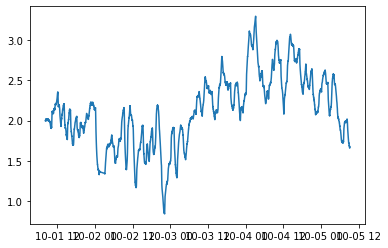

In [31]:
plt.plot(good_data1['AI_top'],label='AI_top')

In [36]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
  #  df.set_index('Time', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'AI_top(t-{i})'] = df['AI_top'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(good_data1, lookback)
shifted_df

,AI_top,AI_top(t-1),AI_top(t-2),AI_top(t-3),AI_top(t-4),AI_top(t-5),AI_top(t-6),AI_top(t-7)
Time,,,,,,,,
2009-10-01 08:21:00,2.01440,2.00260,1.99710,1.99852,2.00385,2.00870,2.00360,2.00000
2009-10-01 08:22:00,2.01669,2.01440,2.00260,1.99710,1.99852,2.00385,2.00870,2.00360
2009-10-01 08:23:00,2.02368,2.01669,2.01440,2.00260,1.99710,1.99852,2.00385,2.00870
2009-10-01 08:24:00,2.01608,2.02368,2.01669,2.01440,2.00260,1.99710,1.99852,2.00385
2009-10-01 08:25:00,2.02237,2.01608,2.02368,2.01669,2.01440,2.00260,1.99710,1.99852
...,...,...,...,...,...,...,...,...
2009-10-05 09:09:00,1.66446,1.67325,1.67338,1.68244,1.68242,1.68894,1.68498,1.69506
2009-10-05 09:10:00,1.66227,1.66446,1.67325,1.67338,1.68244,1.68242,1.68894,1.68498
2009-10-05 09:11:00,1.65845,1.66227,1.66446,1.67325,1.67338,1.68244,1.68242,1.68894


In [38]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np.shape


(5722, 8)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.04460004, -0.05420413, -0.05868062, ..., -0.0492393 ,
        -0.05339023, -0.05632029],
       [-0.04273619, -0.04460004, -0.05420413, ..., -0.05318675,
        -0.0492393 , -0.05339023],
       [-0.03704698, -0.04273619, -0.04460004, ..., -0.05752487,
        -0.05318675, -0.0492393 ],
       ...,
       [-0.33431002, -0.3312009 , -0.32941844, ..., -0.31478441,
        -0.31480068, -0.30949401],
       [-0.32489312, -0.33431002, -0.3312009 , ..., -0.3221584 ,
        -0.31478441, -0.31480068],
       [-0.3193667 , -0.32489312, -0.33431002, ..., -0.32226421,
        -0.3221584 , -0.31478441]])

In [88]:
X=dc(np.flip(X,axis=1))
X.shape


(5722, 7, 4)

In [47]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((5722, 7), (5722,))

In [89]:
split_index = int(len(X) * 0.95)

split_index

5435

In [92]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5435, 7, 4), (287, 7, 4), (5435, 2), (287, 2))

In [44]:
import torch

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [91]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21740, 7, 1), (1148, 7, 1), (10870, 1), (574, 1))

In [93]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5435, 7, 4]),
 torch.Size([287, 7, 4]),
 torch.Size([5435, 2]),
 torch.Size([287, 2]))

In [94]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [57]:
train_dataset

In [95]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [96]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 4]) torch.Size([16, 2])


In [60]:
import torch.nn as nn


In [105]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(4, 4, 3)
model.to(device)
model

LSTM(
  (lstm): LSTM(4, 4, num_layers=3, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [106]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [100]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [107]:
learning_rate = 0.001
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 5.793
Batch 200, Loss: 2.130
Batch 300, Loss: 0.675

Val Loss: 0.463
***************************************************

Epoch: 2
Batch 100, Loss: 0.500
Batch 200, Loss: 0.501
Batch 300, Loss: 0.494

Val Loss: 0.479
***************************************************

Epoch: 3
Batch 100, Loss: 0.498
Batch 200, Loss: 0.491
Batch 300, Loss: 0.469

Val Loss: 0.519
***************************************************

Epoch: 4
Batch 100, Loss: 0.435
Batch 200, Loss: 0.450
Batch 300, Loss: 0.425

Val Loss: 0.496
***************************************************

Epoch: 5
Batch 100, Loss: 0.428
Batch 200, Loss: 0.412
Batch 300, Loss: 0.406

Val Loss: 0.458
***************************************************

Epoch: 6
Batch 100, Loss: 0.425
Batch 200, Loss: 0.404
Batch 300, Loss: 0.407

Val Loss: 0.454
***************************************************

Epoch: 7
Batch 100, Loss: 0.408
Batch 200, Loss: 0.414
Batch 300, Loss: 0.406

Val Loss: 0.450
*****************

In [110]:
predicted.shape

(5435, 1)

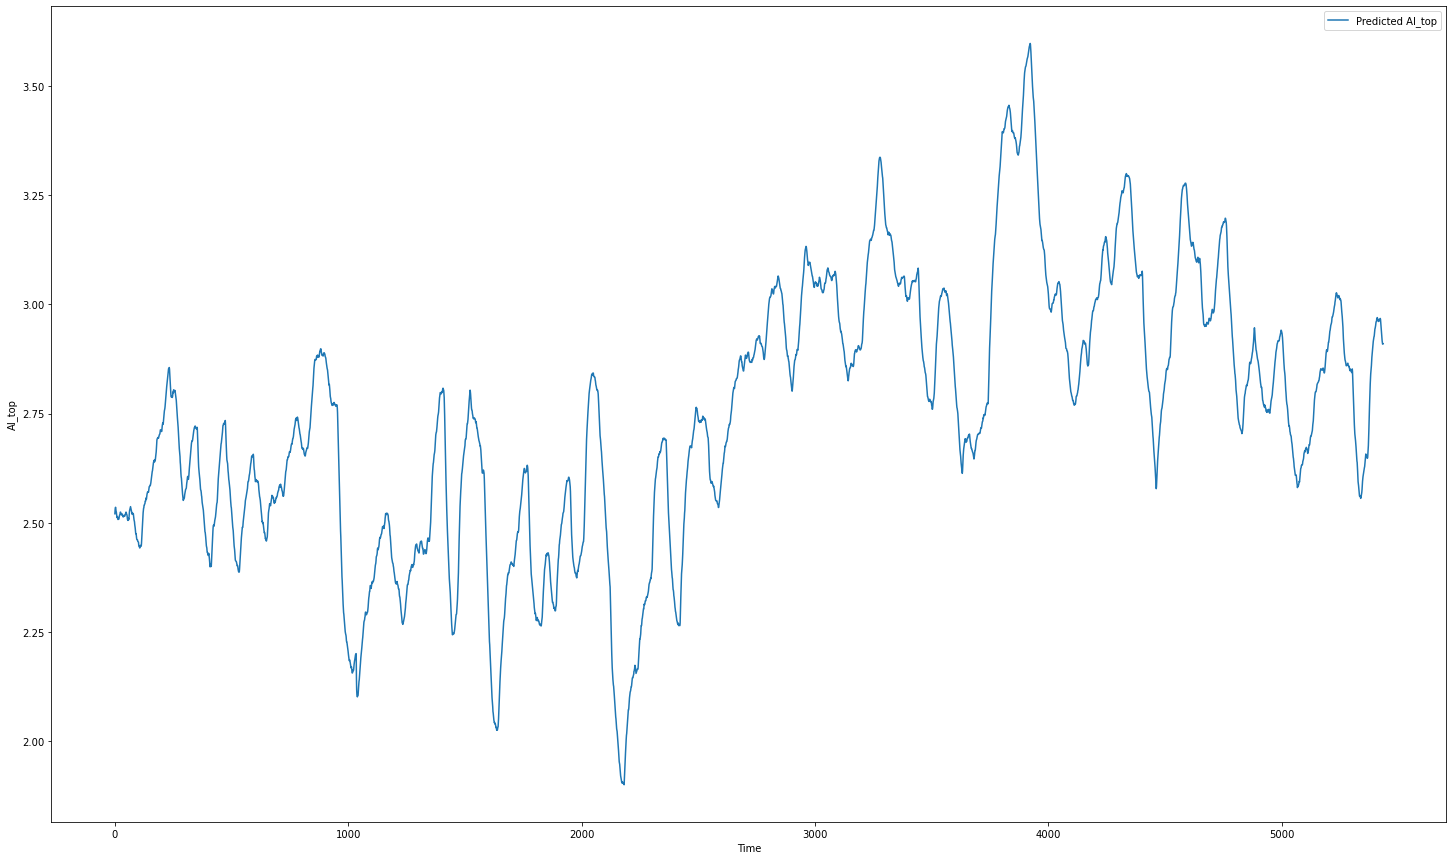

In [109]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

    
plt.figure(figsize = (25, 15))
#plt.plot(y_train, label='Actual AI_top')
plt.plot(predicted, label='Predicted AI_top')
plt.xlabel('Time')
plt.ylabel('AI_top')
plt.legend()
plt.show()


In [67]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([2.00304984, 2.0089797 , 2.0153413 , ..., 2.44760917, 2.44480977,
       2.44486635])

In [68]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([2.0144    , 2.01669   , 2.02368   , ..., 2.45019001, 2.45140999,
       2.45386999])

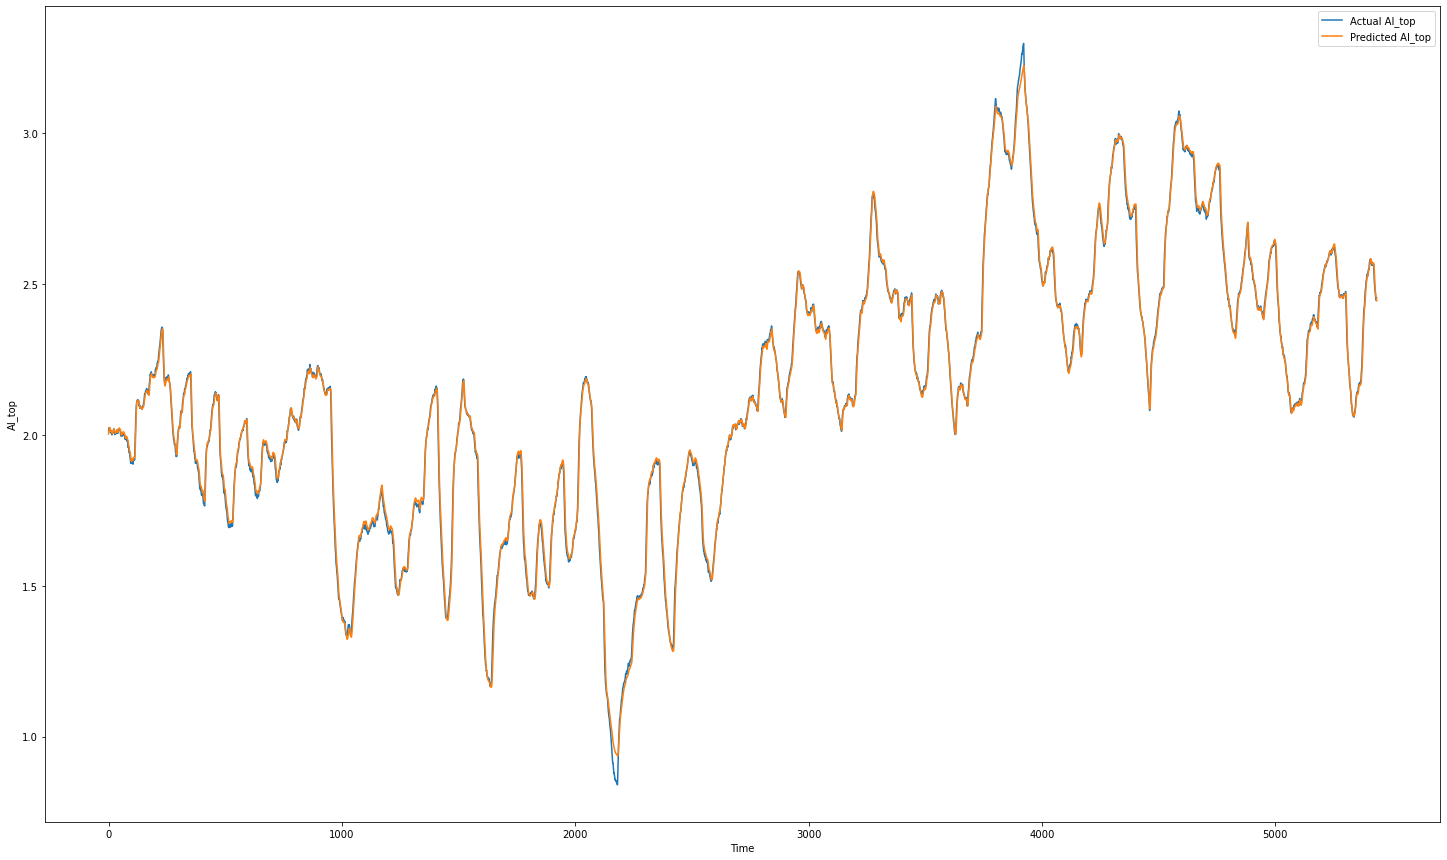

In [69]:
plt.figure(figsize = (25, 15))
plt.plot(new_y_train, label='Actual AI_top')
plt.plot(train_predictions, label='Predicted AI_top')
plt.xlabel('Time')
plt.ylabel('AI_top')
plt.legend()
plt.show()


In [70]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([2.44724066, 2.45066481, 2.4541846 , 2.45681508, 2.45688162,
       2.45352949, 2.44998038, 2.44841843, 2.44648893, 2.44649076,
       2.44747424, 2.44708907, 2.44352725, 2.43761853, 2.43127317,
       2.42265217, 2.41554086, 2.40977143, 2.40427571, 2.39994934,
       2.39618927, 2.38878364, 2.3811087 , 2.37480066, 2.36686245,
       2.35875323, 2.34953659, 2.3374565 , 2.32641015, 2.31730997,
       2.30803624, 2.302731  , 2.29636325, 2.28520683, 2.27199035,
       2.26180681, 2.25349969, 2.24541814, 2.23699993, 2.22942067,
       2.22550487, 2.22047311, 2.2161164 , 2.20580041, 2.19475171,
       2.18631056, 2.17522494, 2.16663   , 2.15888518, 2.15101287,
       2.13609169, 2.12081134, 2.10840472, 2.09555126, 2.08797273,
       2.07916166, 2.0711913 , 2.06305418, 2.0567552 , 2.04934191,
       2.04595104, 2.04312513, 2.03935805, 2.03709183, 2.03521123,
       2.03359857, 2.03412301, 2.03444222, 2.03506321, 2.03213941,
       2.0284435 , 2.02524803, 2.02221654, 2.02218128, 2.01784

In [71]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([2.4559    , 2.45856   , 2.46047998, 2.45770999, 2.4512    ,
       2.45003999, 2.45205001, 2.44874999, 2.45067001, 2.45151999,
       2.44875999, 2.44223   , 2.43542001, 2.43061001, 2.42066001,
       2.41682002, 2.41231001, 2.40640001, 2.4034    , 2.39977999,
       2.38738999, 2.38196999, 2.37831   , 2.36804999, 2.36063001,
       2.35033   , 2.33571   , 2.32884999, 2.32215   , 2.31122   ,
       2.31069   , 2.30054001, 2.28365   , 2.27150999, 2.26719001,
       2.26003   , 2.25065   , 2.24003   , 2.23385001, 2.23481   ,
       2.22605   , 2.22149   , 2.20352   , 2.19532   , 2.1921    ,
       2.17628   , 2.17054   , 2.16283   , 2.15335   , 2.13039   ,
       2.11808   , 2.10994   , 2.09551   , 2.0927    , 2.07822   ,
       2.07025   , 2.06223   , 2.05743   , 2.04661   , 2.04845   ,
       2.04296   , 2.03722   , 2.03667   , 2.0344    , 2.03226   ,
       2.03557   , 2.03337   , 2.03426   , 2.02689   , 2.02393   ,
       2.02263   , 2.01976   , 2.02262   , 2.01098   , 2.01316

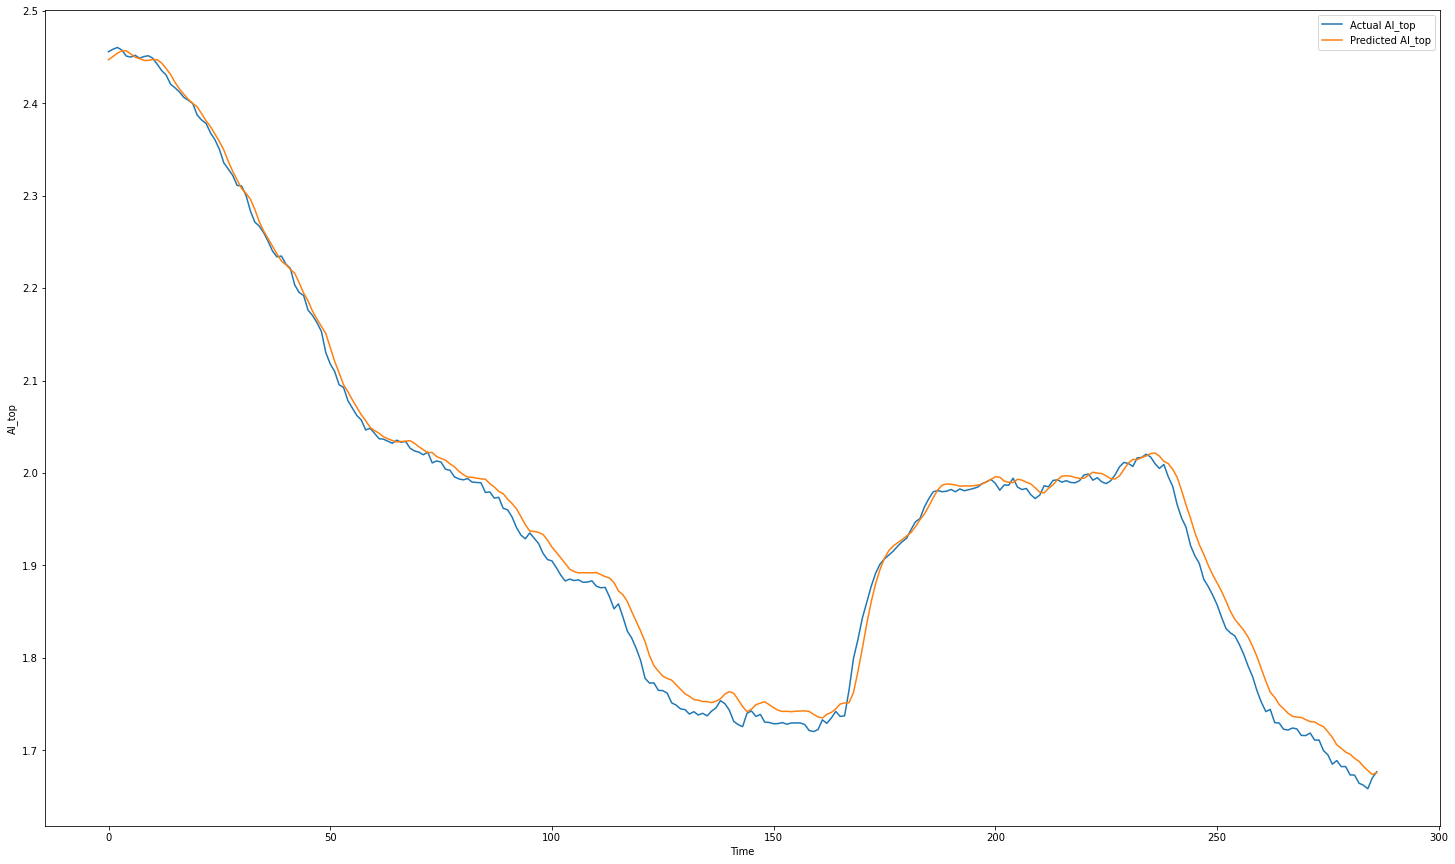

In [72]:
plt.figure(figsize = (25, 15))
plt.plot(new_y_test, label='Actual AI_top')
plt.plot(test_predictions, label='Predicted AI_top')
plt.xlabel('Time')
plt.ylabel('AI_top')
plt.legend()
plt.show()




In [75]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2]]
    y.append(label)
  return np.array(X), np.array(y)

In [77]:
good_data.head()

,AI_top,AI_middle,AI_bottom,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF
Time,,,,,,,,,,,,,,,,,,
2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000,2.10000,1.70000,5.02153,2.5,41.5425,2.64333,1.5,39.6248,1.55033,8.0,27.0211,8.06381,2.00000,200.0
2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735,2.09686,1.71730,4.98768,2.5,40.7619,2.51377,1.5,32.2511,1.43952,8.0,30.9622,8.02407,1.99772,200.0
2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977,2.09280,1.72500,4.93990,2.5,39.5543,2.39550,1.5,36.5874,1.55065,8.0,33.4288,7.92434,1.99552,200.0
2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838,2.08587,1.71878,4.93333,2.5,39.3031,2.32773,1.5,37.0797,1.50101,8.0,26.2273,8.03058,1.99483,200.0
2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365,2.08028,1.71360,4.96880,2.5,40.1886,2.50900,1.5,33.2056,1.48210,8.0,29.6134,8.06181,1.99465,200.0


In [79]:
list(good_data.columns)

['AI_top',
 'AI_middle',
 'AI_bottom',
 'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
 'FIC-2101_PV_TOP_PRODUCT_MBBL/D',
 'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
 'FI-2005_PV_FEED_FLOW_MBBL/D',
 'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
 'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
 'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
 'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
 'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
 'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
 'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
 'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%',
 'FIC_2004_PV_TOP_REFLUX_MBBL/D',
 'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
 'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']

In [80]:
good_data2=good_data[['AI_top', 'AI_middle','AI_bottom','FIC_2100_PV_FEED_FURNACE_FUEL_SCFH']]

In [82]:
good_data2.rename(columns={'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH': 'FIC_furnace'}, inplace=True)

<ipython-input-82-6055a3bfde2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data2.rename(columns={'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH': 'FIC_furnace'}, inplace=True)


In [83]:
good_data2.head()

,AI_top,AI_middle,AI_bottom,FIC_furnace
Time,,,,
2009-10-01 08:14:00,2.00000,3.00000,4.00000,8.50000
2009-10-01 08:15:00,2.00360,3.00954,3.99831,8.50735
2009-10-01 08:16:00,2.00870,2.99518,3.97746,8.50977
2009-10-01 08:17:00,2.00385,3.01356,3.97262,8.50838
2009-10-01 08:18:00,1.99852,3.02963,3.98841,8.50365


In [84]:
X, y = df_to_X_y(good_data2)

In [85]:
X.shape, y.shape

((5722, 7, 4), (5722, 2))

In [87]:
X[0]

array([[2.     , 3.     , 4.     , 8.5    ],
       [2.0036 , 3.00954, 3.99831, 8.50735],
       [2.0087 , 2.99518, 3.97746, 8.50977],
       [2.00385, 3.01356, 3.97262, 8.50838],
       [1.99852, 3.02963, 3.98841, 8.50365],
       [1.9971 , 3.0257 , 3.99264, 8.50548],
       [2.0026 , 3.03318, 3.994  , 8.50693]])